In [ ]:
!pip install tensorflow pillow

import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, save_img

# Path to your dataset folder
dataset_dir = "/content/drive/MyDrive/food classification"

# Augmentation configuration
datagen = ImageDataGenerator(
    rotation_range=25,         # random rotation (0–25°)
    width_shift_range=0.2,     # horizontal shift
    height_shift_range=0.2,    # vertical shift
    shear_range=0.15,          # shearing
    zoom_range=0.2,            # zoom in/out
    horizontal_flip=True,      # random left/right flip
    brightness_range=[0.7, 1.3],  # brightness change
    fill_mode='nearest'
)

# How many augmented images to create per original
num_augmented = 10  # each original will generate 10 new images

# Loop through each class folder
for class_name in os.listdir(dataset_dir):
    class_path = os.path.join(dataset_dir, class_name)
    if not os.path.isdir(class_path):
        continue

    print(f"Processing class: {class_name}")
    for filename in os.listdir(class_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(class_path, filename)
            image = load_img(img_path)  # load image
            x = img_to_array(image)
            x = x.reshape((1,) + x.shape)

            # Create augmented images and save them
            i = 0
            for batch in datagen.flow(x, batch_size=1,
                                      save_to_dir=class_path,
                                      save_prefix='aug',
                                      save_format='jpg'):
                i += 1
                if i >= num_augmented:
                    break  # stop after generating desired number

print("✅ Augmentation complete! New images saved inside each class folder.")


Processing class: burger
Processing class: salad
Processing class: soup
Processing class: sushi
Processing class: pizza
✅ Augmentation complete! New images saved inside each class folder.


In [ ]:
import os, hashlib

dataset_dir = "/content/drive/MyDrive/food classification"
hashes = set()

for folder in os.listdir(dataset_dir):
    folder_path = os.path.join(dataset_dir, folder)
    for file in os.listdir(folder_path):
        path = os.path.join(folder_path, file)
        with open(path, "rb") as f:
            filehash = hashlib.md5(f.read()).hexdigest()
        if filehash in hashes:
            os.remove(path)  # delete duplicate
        else:
            hashes.add(filehash)
print("✅ Duplicates removed!")


✅ Duplicates removed!


In [ ]:
from PIL import Image
import os

size = (224, 224)
dataset_dir = "/content/drive/MyDrive/food classification"

for folder in os.listdir(dataset_dir):
    folder_path = os.path.join(dataset_dir, folder)
    for file in os.listdir(folder_path):
        if file.lower().endswith(('.jpg', '.png', '.jpeg')):
            path = os.path.join(folder_path, file)
            img = Image.open(path)
            img = img.resize(size)
            img.save(path)

print("✅ All images resized to 224x224!")


✅ All images resized to 224x224!


In [ ]:
import os

dataset_dir = "/content/drive/MyDrive/food classification"

for class_name in os.listdir(dataset_dir):
    class_path = os.path.join(dataset_dir, class_name)
    if not os.path.isdir(class_path):
        continue

    print(f"Renaming files in: {class_name}")
    for i, filename in enumerate(sorted(os.listdir(class_path))):
        if filename.lower().endswith(('.jpg', '.png', '.jpeg')):
            new_name = f"{class_name}_{i+1:03d}.jpg"
            os.rename(
                os.path.join(class_path, filename),
                os.path.join(class_path, new_name)
            )

print("✅ All files renamed consistently!")


Renaming files in: burger
Renaming files in: salad
Renaming files in: soup
Renaming files in: sushi
Renaming files in: pizza
✅ All files renamed consistently!


In [ ]:
import os, shutil, random

# Current dataset folder in Drive
base_dir = "/content/drive/MyDrive/food classification"

# New folder for the split dataset (will be created)
output_dir = "/content/drive/MyDrive/food_classification_split"

# Create split ratios
split_ratios = {"train": 0.7, "val": 0.15, "test": 0.15}

# Get class folders (pizza, burger, etc.)
classes = [d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))]

for cls in classes:
    src = os.path.join(base_dir, cls)
    images = [f for f in os.listdir(src) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]
    random.shuffle(images)

    n_total = len(images)
    n_train = int(n_total * split_ratios["train"])
    n_val = int(n_total * split_ratios["val"])

    subsets = {
        "train": images[:n_train],
        "val": images[n_train:n_train + n_val],
        "test": images[n_train + n_val:]
    }

    for split, files in subsets.items():
        dest = os.path.join(output_dir, split, cls)
        os.makedirs(dest, exist_ok=True)
        for f in files:
            shutil.copy(os.path.join(src, f), os.path.join(dest, f))

print("✅ Split dataset created in Google Drive (check MyDrive/food_classification_split)")


✅ Split dataset created in Google Drive (check MyDrive/food_classification_split)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!pip install -q tensorflow scikit-learn matplotlib seaborn


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
import os

DATA_DIR = "/content/drive/MyDrive/food_classification_split"
IMG_SIZE = (224,224)
BATCH_SIZE = 32
SEED = 123

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(DATA_DIR, "train"),
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    seed=SEED,
    label_mode='int'
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(DATA_DIR, "val"),
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    seed=SEED,
    label_mode='int'
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(DATA_DIR, "test"),
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    seed=SEED,
    label_mode='int',
    shuffle=False
)

class_names = train_ds.class_names
NUM_CLASSES = len(class_names)
print("✅ Classes:", class_names)


Found 375 files belonging to 5 classes.
Found 78 files belonging to 5 classes.
Found 84 files belonging to 5 classes.
✅ Classes: ['burger', 'pizza', 'salad', 'soup', 'sushi']


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

def prepare(ds, shuffle=False):
    ds = ds.map(lambda x,y: (tf.cast(x, tf.float32)/255.0, y), num_parallel_calls=AUTOTUNE)
    if shuffle:
        ds = ds.shuffle(1000, seed=SEED)
    return ds.cache().prefetch(buffer_size=AUTOTUNE)

train_ds = prepare(train_ds, shuffle=True)
val_ds = prepare(val_ds)
test_ds = prepare(test_ds)


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, accuracy_score
from scipy.stats import mode
import numpy as np, tensorflow as tf, os
import matplotlib.pyplot as plt
import seaborn as sns


# Path to your dataset
DATA_DIR = "/content/drive/MyDrive/food_classification_split/test"
IMG_SIZE = (224, 224)

class_names = sorted(os.listdir(DATA_DIR))
print("Classes:", class_names)

# Pretrained MobileNetV2 for feature extraction
base = MobileNetV2(weights='imagenet', include_top=False, pooling='avg', input_shape=(224,224,3))

# Load all images & extract features
X, y = [], []
for cls_idx, cls in enumerate(class_names):
    folder = os.path.join(DATA_DIR, cls)
    for f in os.listdir(folder):
        if f.lower().endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(folder, f)
            img = tf.keras.preprocessing.image.load_img(img_path, target_size=IMG_SIZE)
            arr = tf.keras.preprocessing.image.img_to_array(img)
            arr = preprocess_input(arr)
            X.append(arr)
            y.append(cls_idx)

X = np.array(X)
y = np.array(y)
print(f"Extracting features for {len(X)} images...")

features = base.predict(X, batch_size=32, verbose=1)
print("✅ Feature extraction complete!")


Classes: ['burger', 'pizza', 'salad', 'soup', 'sushi']
Extracting features for 84 images...
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step
✅ Feature extraction complete!


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, accuracy_score
from scipy.stats import mode

n_clusters = len(class_names)
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(features)


labels_map = {}
for c in range(n_clusters):
    mask = clusters == c
    if np.any(mask):
        labels_map[c] = mode(y[mask], keepdims=False)[0]

mapped_preds = np.array([labels_map[c] for c in clusters])

acc = accuracy_score(y, mapped_preds)
ari = adjusted_rand_score(y, clusters)

print(f"🔹 Cluster Accuracy (after mapping): {acc:.4f}")
print(f"🔹 Adjusted Rand Index (ARI): {ari:.4f}")


🔹 Cluster Accuracy (after mapping): 0.5595
🔹 Adjusted Rand Index (ARI): 0.2561


In [ ]:
acc = accuracy_score(y, mapped_preds)
f1 = f1_score(y, mapped_preds, average='macro')
ari = adjusted_rand_score(y, clusters)

print("\n📊 Unsupervised Model Performance:")
print(f"Accuracy (after mapping): {acc:.4f}")
print(f"F1-score:                 {f1:.4f}")
print(f"Adjusted Rand Index (ARI):{ari:.4f}")


📊 Unsupervised Model Performance:
Accuracy (after mapping): 0.5595
F1-score:                 0.4957
Adjusted Rand Index (ARI):0.2561


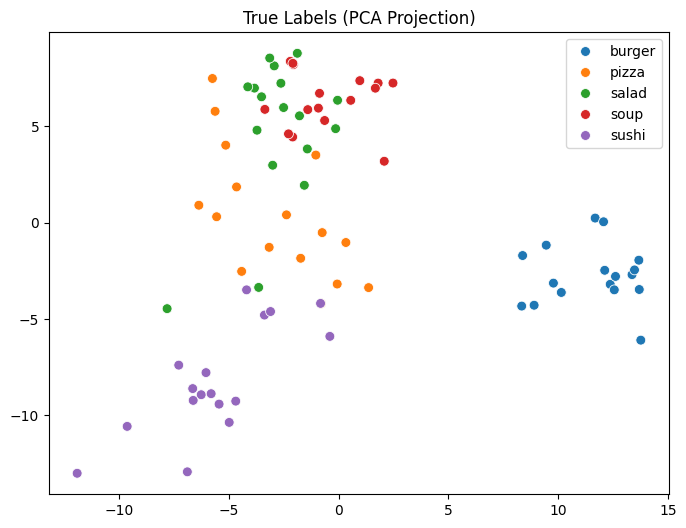

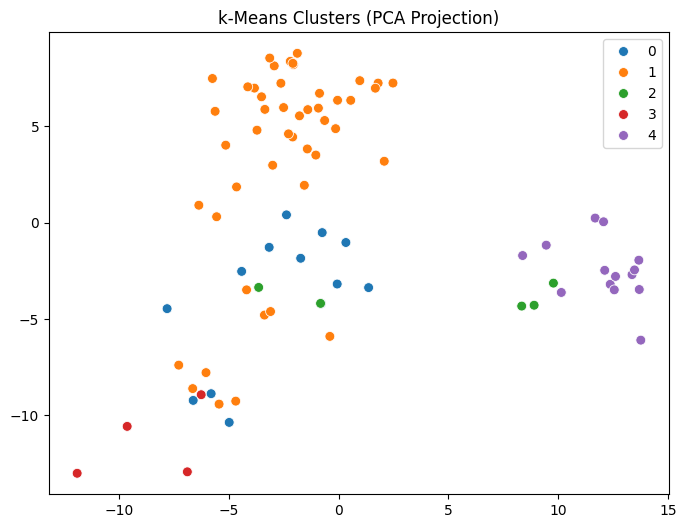

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
emb_2d = pca.fit_transform(features)

plt.figure(figsize=(8,6))
sns.scatterplot(x=emb_2d[:,0], y=emb_2d[:,1],
                hue=[class_names[i] for i in y],
                palette='tab10', s=50)
plt.title("True Labels (PCA Projection)")
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(x=emb_2d[:,0], y=emb_2d[:,1],
                hue=clusters,
                palette='tab10', s=50)
plt.title("k-Means Clusters (PCA Projection)")
plt.show()


In [ ]:
from tensorflow.keras import layers, models, optimizers, callbacks

baseline_model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(NUM_CLASSES, activation='softmax')
])

baseline_model.compile(
    optimizer=optimizers.Adam(1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

es = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history_base = baseline_model.fit(train_ds, validation_data=val_ds, epochs=10, callbacks=[es])


Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 88s 5s/step - accuracy: 0.2226 - loss: 1.6369 - val_accuracy: 0.3205 - val_loss: 1.5186
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 47s 4s/step - accuracy: 0.3556 - loss: 1.4474 - val_accuracy: 0.4744 - val_loss: 1.3734
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 43s 4s/step - accuracy: 0.4880 - loss: 1.2732 - val_accuracy: 0.5385 - val_loss: 1.2406
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 43s 4s/step - accuracy: 0.6531 - loss: 1.0685 - val_accuracy: 0.5256 - val_loss: 1.1414
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.7198 - loss: 0.9098 - val_accuracy: 0.5641 - val_loss: 1.0761
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.7391 - loss: 0.7942 - val_accuracy: 0.5641 - val_loss: 1.0106
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 84s 4s/step - accuracy: 0.7509 - loss: 0.7368 - val_accuracy: 0.5897 - val_loss: 0.9533
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 43s 4s/step - accuracy: 0.8230 - loss: 0.5991 - val_accuracy: 0.6667 - val_loss:

In [ ]:
from tensorflow.keras.applications import MobileNetV2

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.trainable = False  # freeze pretrained layers

improved_model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(NUM_CLASSES, activation='softmax')
])

improved_model.compile(
    optimizer=optimizers.Adam(1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_imp = improved_model.fit(train_ds, validation_data=val_ds, epochs=10, callbacks=[es])


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.2125 - loss: 1.8966 - val_accuracy: 0.2821 - val_loss: 1.6207
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.2658 - loss: 1.6051 - val_accuracy: 0.3846 - val_loss: 1.4465
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.3503 - loss: 1.4885 - val_accuracy: 0.4487 - val_loss: 1.2987
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.4256 - loss: 1.4201 - val_accuracy: 0.5641 - val_loss: 1.1698
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.4994 - loss: 1.2198 - val_accuracy: 0.6154 - val_loss: 1.0559
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.5500 - loss: 1.1133 - val_accuracy: 0.6923 - val_loss: 0.9543
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.6212 - loss: 0.9737 - val_accuracy: 0.7692 - val_loss: 0.8662
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.6546 

3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step
📊 Baseline CNN Results:
Accuracy: 0.8214
F1-score: 0.8158
              precision    recall  f1-score   support

      burger       0.67      0.82      0.74        17
       pizza       0.88      0.82      0.85        17
       salad       0.83      0.88      0.86        17
        soup       0.90      0.56      0.69        16
       sushi       0.89      1.00      0.94        17

    accuracy                           0.82        84
   macro avg       0.83      0.82      0.82        84
weighted avg       0.83      0.82      0.82        84



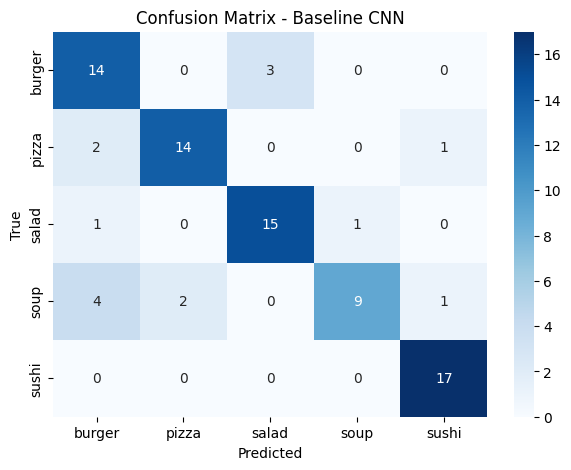

3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step
📊 Improved MobileNetV2 Results:
Accuracy: 0.9405
F1-score: 0.9402
              precision    recall  f1-score   support

      burger       1.00      1.00      1.00        17
       pizza       0.85      1.00      0.92        17
       salad       0.93      0.82      0.88        17
        soup       0.94      0.94      0.94        16
       sushi       1.00      0.94      0.97        17

    accuracy                           0.94        84
   macro avg       0.94      0.94      0.94        84
weighted avg       0.94      0.94      0.94        84



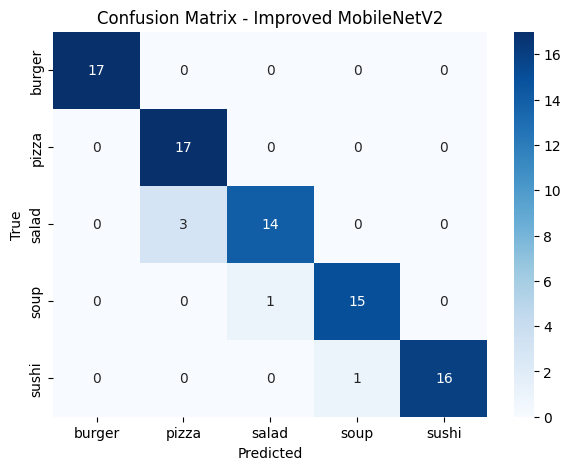

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(model, name):
    y_probs = model.predict(test_ds)
    y_preds = np.argmax(y_probs, axis=1)
    y_true = np.concatenate([y for _, y in test_ds], axis=0)

    acc = accuracy_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds, average='macro')
    print(f"📊 {name} Results:")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(classification_report(y_true, y_preds, target_names=class_names))

    cm = confusion_matrix(y_true, y_preds)
    plt.figure(figsize=(7,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

evaluate_model(baseline_model, "Baseline CNN")
evaluate_model(improved_model, "Improved MobileNetV2")


In [ ]:
import albumentations as A
import cv2
import os
from tqdm import tqdm
from concurrent.futures import ThreadPoolExecutor # Added this import

# Input and output directories
input_dir = "/content/drive/MyDrive/food classification"
artaug_dir = "/content/drive/MyDrive/food_artaug"
os.makedirs(artaug_dir, exist_ok=True)

# Optimized ArtAug pipeline (fast + effective)
artaug = A.Compose([
    A.RandomBrightnessContrast(p=0.5),
    A.HueSaturationValue(p=0.4),
    A.RandomResizedCrop(size=(224, 224), scale=(0.8, 1.0), p=0.6), # Fixed size to tuple, scale max to 1.0
    A.HorizontalFlip(p=0.5),
    A.Rotate(limit=25, p=0.5),
    A.ColorJitter(p=0.3),
])

# Function to augment a single image
def augment_image(args):
    img_path, dst = args
    img_name = os.path.basename(img_path)

    image = cv2.imread(img_path)
    if image is None:
        return

    # Resize first for speed
    image = cv2.resize(image, (224, 224))

    # Apply augmentation
    augmented = artaug(image=image)["image"]

    # Save augmented image
    save_path = os.path.join(dst, "artaug_" + img_name)
    cv2.imwrite(save_path, augmented)

# Create tasks for all images in all class folders
tasks = []
for cls in os.listdir(input_dir):
    src = os.path.join(input_dir, cls)
    dst = os.path.join(artaug_dir, cls)
    os.makedirs(dst, exist_ok=True)

    for img_name in os.listdir(src):
        if img_name.lower().endswith(('.jpg', '.jpeg', '.png')):
            tasks.append((os.path.join(src, img_name), dst))

# Process images in parallel using multiple threads
with ThreadPoolExecutor(max_workers=8) as executor:  # adjust 8 to your CPU cores
    list(tqdm(executor.map(augment_image, tasks), total=len(tasks)))

print("✅ ArtAug synthetic dataset created!")

100%|██████████| 13822/13822 [15:52<00:00, 14.52it/s]

✅ ArtAug synthetic dataset created!


In [ ]:
import shutil

base_dir = "/content/drive/MyDrive/food classification"
artaug_dir = "/content/drive/MyDrive/food_artaug"
combined_dir = "/content/drive/MyDrive/food_combined"

os.makedirs(combined_dir, exist_ok=True)

for cls in os.listdir(base_dir):
    os.makedirs(os.path.join(combined_dir, cls), exist_ok=True)
    # copy originals
    for f in os.listdir(os.path.join(base_dir, cls)):
        shutil.copy(os.path.join(base_dir, cls, f), os.path.join(combined_dir, cls, f))
    # copy ArtAug images
    for f in os.listdir(os.path.join(artaug_dir, cls)):
        shutil.copy(os.path.join(artaug_dir, cls, f), os.path.join(combined_dir, cls, f))

print("✅ Combined dataset ready for retraining")


✅ Combined dataset ready for retraining


In [ ]:
from tensorflow.keras import layers, models, optimizers, callbacks
from tensorflow.keras.applications import MobileNetV2

NUM_CLASSES = 5

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.trainable = False  # freeze pretrained layers

improved_model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(NUM_CLASSES, activation='softmax')
])

improved_model.compile(
    optimizer=optimizers.Adam(1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# early stopping callback
es = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
import tensorflow as tf
import os

DATA_DIR = "/content/drive/MyDrive/food_classification_split"
IMG_SIZE = (224,224)
BATCH_SIZE = 32
SEED = 123

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(DATA_DIR, "train"),
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    seed=SEED,
    label_mode='int'
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(DATA_DIR, "val"),
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    seed=SEED,
    label_mode='int'
)
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(DATA_DIR, "test"),
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    seed=SEED,
    label_mode='int',
    shuffle=False
)


Found 375 files belonging to 5 classes.
Found 78 files belonging to 5 classes.
Found 84 files belonging to 5 classes.


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
def prepare(ds, shuffle=False):
    ds = ds.map(lambda x,y: (tf.cast(x, tf.float32)/255.0, y), num_parallel_calls=AUTOTUNE)
    if shuffle:
        ds = ds.shuffle(1000, seed=SEED)
    return ds.cache().prefetch(buffer_size=AUTOTUNE)

train_ds = prepare(train_ds, shuffle=True)
val_ds = prepare(val_ds)
test_ds = prepare(test_ds)


In [ ]:
history_artaug = improved_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    callbacks=[es]
)


Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 201s 4s/step - accuracy: 0.2100 - loss: 2.0600 - val_accuracy: 0.2564 - val_loss: 1.7101
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.2666 - loss: 1.7019 - val_accuracy: 0.3590 - val_loss: 1.5001
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.3467 - loss: 1.4995 - val_accuracy: 0.4359 - val_loss: 1.3274
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.4472 - loss: 1.3852 - val_accuracy: 0.5641 - val_loss: 1.1830
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.4737 - loss: 1.2971 - val_accuracy: 0.6923 - val_loss: 1.0586
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.5526 - loss: 1.0880 - val_accuracy: 0.7308 - val_loss: 0.9511
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.5934 - loss: 1.0627 - val_accuracy: 0.7949 - val_loss: 0.8577
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.6693 - loss: 0.9204 - val_accuracy: 0.8333 - val_loss

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(model, name):
    # get true labels and predictions
    y_probs = model.predict(test_ds)
    y_preds = np.argmax(y_probs, axis=1)
    y_true = np.concatenate([y for _, y in test_ds], axis=0)

    acc = accuracy_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds, average='macro')

    print(f"📊 {name} Results:")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(classification_report(y_true, y_preds, target_names=class_names))

    # plot confusion matrix
    cm = confusion_matrix(y_true, y_preds)
    plt.figure(figsize=(7,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()


In [ ]:
import os

DATA_DIR = "/content/drive/MyDrive/food_classification_split/train"
class_names = sorted(os.listdir(DATA_DIR))
print("Classes:", class_names)


✅ Classes: ['burger', 'pizza', 'salad', 'soup', 'sushi']


3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step
📊 MobileNetV2 + ArtAug Results:
Accuracy: 0.9524
F1-score: 0.9529
              precision    recall  f1-score   support

      burger       1.00      1.00      1.00        17
       pizza       0.89      0.94      0.91        17
       salad       0.94      0.94      0.94        17
        soup       1.00      0.94      0.97        16
       sushi       0.94      0.94      0.94        17

    accuracy                           0.95        84
   macro avg       0.95      0.95      0.95        84
weighted avg       0.95      0.95      0.95        84



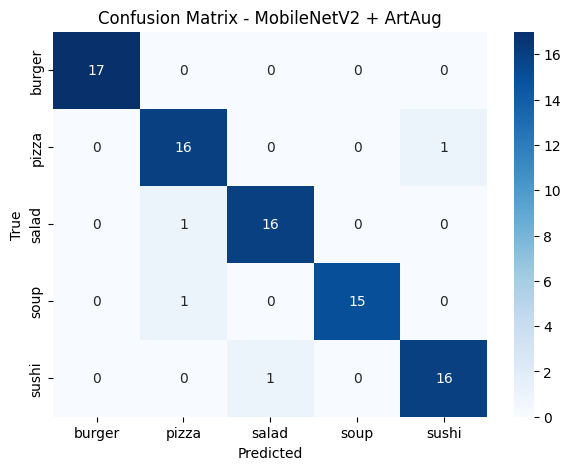

In [ ]:
evaluate_model(improved_model, "MobileNetV2 + ArtAug")


In [ ]:
improved_model.save("/content/drive/MyDrive/food_model.h5")
